In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv("/content/heart.csv")

In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
#to kno the number of values in the features
for feature in data.columns:
  print(feature,":" ,len(data[feature].unique()))

age : 41
sex : 2
cp : 4
trtbps : 49
chol : 152
fbs : 2
restecg : 3
thalachh : 91
exng : 2
oldpeak : 40
slp : 3
caa : 5
thall : 4
output : 2


In [6]:
#we need to divided the dicrete and continous data 
discrete_features,continous_feature = [],[]
for feature in data.columns:
  if feature == "output":
    label = [feature]

  elif len(data[feature].unique()) < 15:
    discrete_features.append(feature)

  else: 
    continous_feature.append(feature)




In [7]:
print("discrete_features: ",discrete_features)
print("continous_feature: ",continous_feature)

discrete_features:  ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
continous_feature:  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


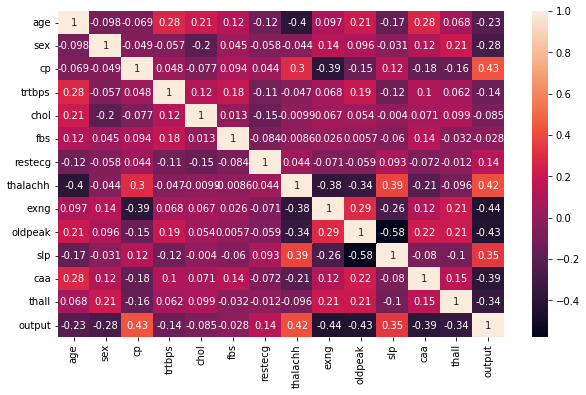

In [8]:
corrmat = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corrmat, annot=True)

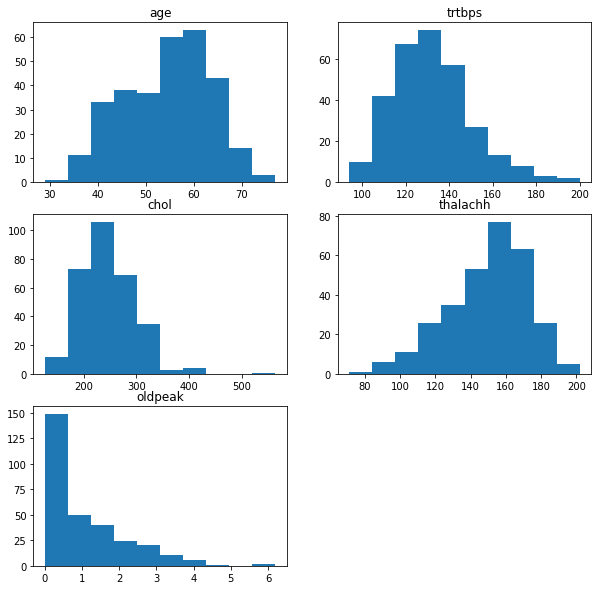

In [9]:
fig,axes = plt.subplots(3,2,figsize=(10,10))
axes = axes.ravel()
for a,b in enumerate(axes[:-1]):
  b.hist(data[continous_feature[a]])
  b.set_title(continous_feature[a])
axes[-1].set_visible(False)


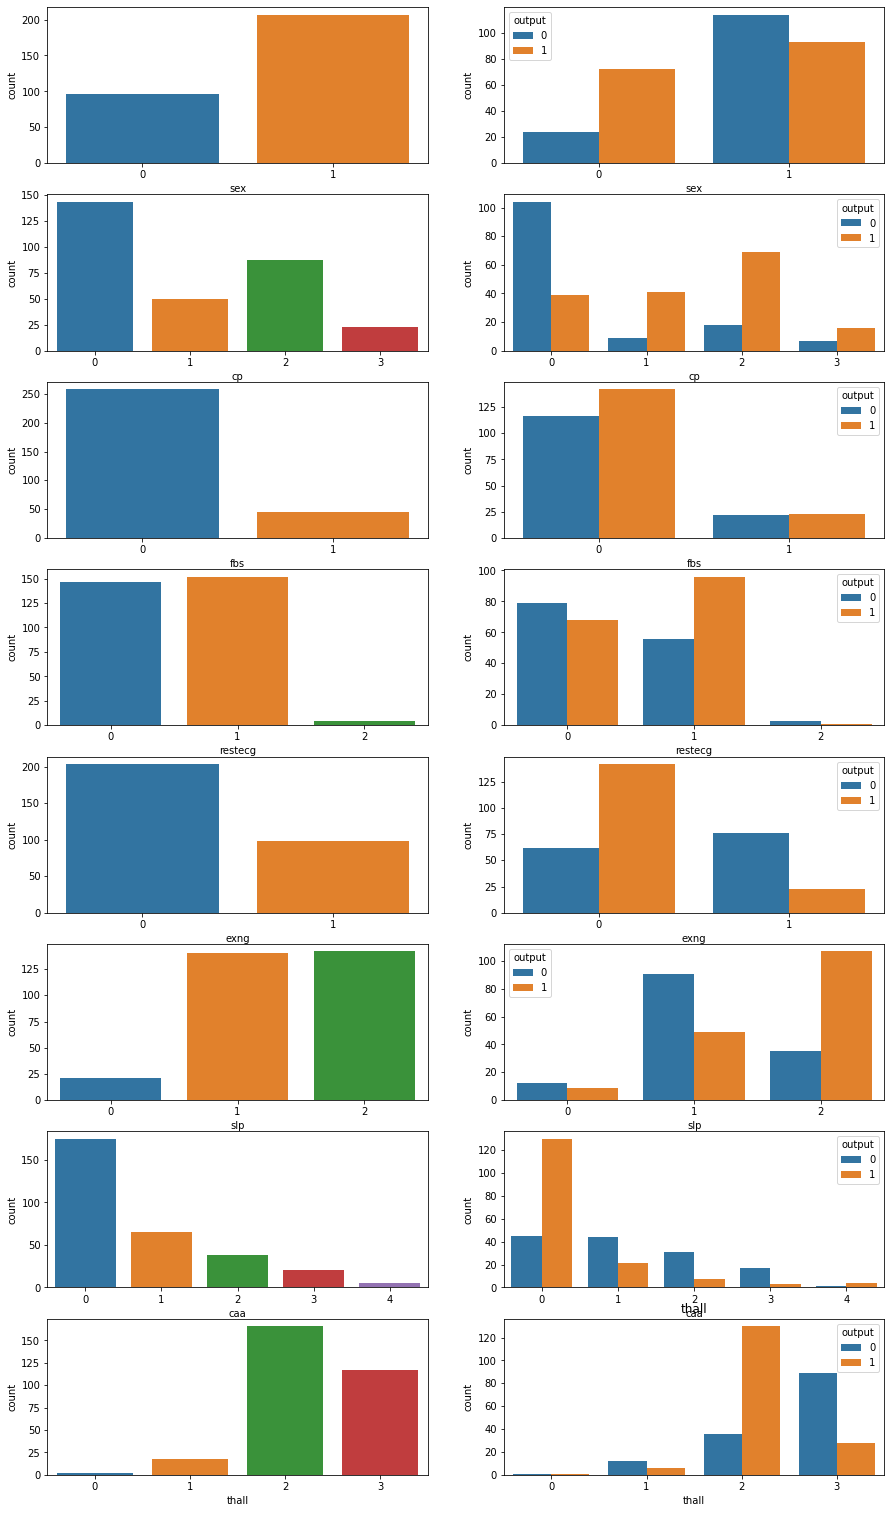

In [10]:
fig,ax = plt.subplots(len(discrete_features),2,figsize=(15,27))
for i in range(len(discrete_features)):
  plt.title(discrete_features[i])
  sns.countplot(ax=ax[i,0], x=discrete_features[i], data=data)
  sns.countplot(ax=ax[i,1], x=discrete_features[i], hue="output", data=data)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age')

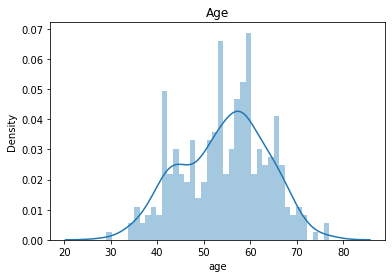

In [11]:
sns.distplot(data["age"],kde=True, bins=40)
plt.title("Age")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Attack & Age')

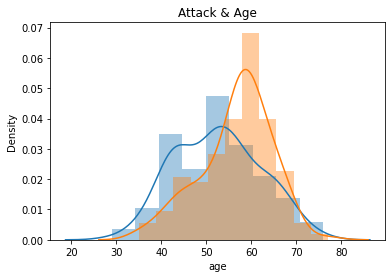

In [12]:
sns.distplot(data[data["output"]==1]["age"])
sns.distplot(data[data["output"]==0]["age"])
plt.title("Attack & Age")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Attack & cholestrol')

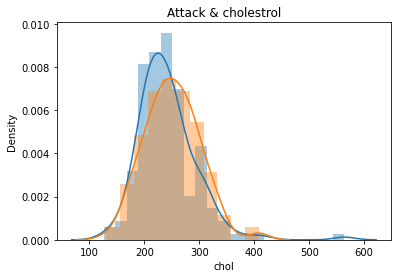

In [13]:
sns.distplot(data[data["output"]==1]["chol"])
sns.distplot(data[data["output"]==0]["chol"])
plt.title("Attack & cholestrol")

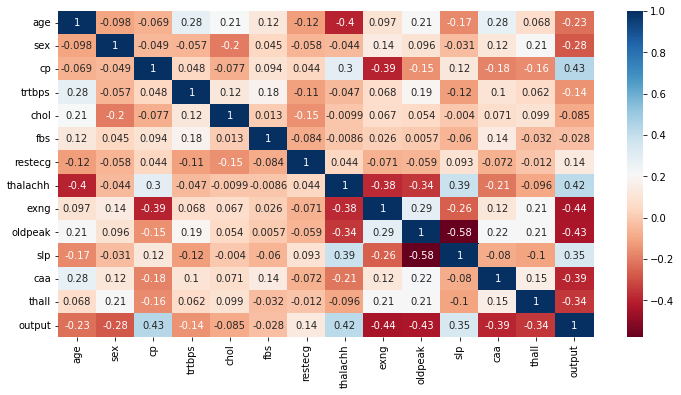

In [14]:
corrmat = data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corrmat, annot=True, cmap="RdBu")
#cp, thalachh, slp

In [15]:
X = data.drop("output", axis=1)
y = data["output"]

In [16]:
standerscaler = StandardScaler()

In [17]:
X = standerscaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
logModel = LogisticRegression()

In [21]:
logModel.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = logModel.predict(X_test)

In [23]:
logscore = accuracy_score(y_test,y_pred)
print(logscore)

0.8131868131868132


In [25]:
randomforestmodel = RandomForestClassifier(n_estimators=1500, max_depth=5, random_state=40)

In [26]:
randomforestmodel.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=1500, random_state=40)

In [27]:
y_pred = randomforestmodel.predict(X_test)

In [28]:
randomforestscore = accuracy_score(y_test,y_pred)

In [29]:
print(randomforestscore)

0.8241758241758241


In [31]:
SVMmodel = SVC(random_state=0)

In [32]:
SVMmodel.fit(X_train,y_train)

SVC(random_state=0)

In [33]:
y_pred = SVMmodel.predict(X_test)

In [34]:
svmscore = accuracy_score(y_test,y_pred)

In [35]:
print(svmscore)

0.8131868131868132


In [37]:
KNNmodel = KNeighborsClassifier()

In [38]:
KNNmodel.fit(X_train,y_train)

KNeighborsClassifier()

In [39]:
y_pred = KNNmodel.predict(X_test)

In [40]:
knnscore = accuracy_score(y_test,y_pred)

In [41]:
print(knnscore)

0.8791208791208791


In [43]:
y_predict_proba = KNNmodel.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba)

Text(0, 0.5, 'tpr')

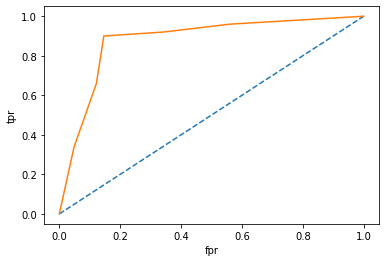

In [44]:
plt.plot([0,1],[0,1],"--")
plt.plot(fpr,tpr,label="KNNmodel")
plt.xlabel("fpr")
plt.ylabel("tpr")

In [73]:
models = pd.DataFrame({"Accuracy":[knnscore,randomforestscore,logscore,svmscore],"Model":["KNN","RandomForestClassifier","LogisticRegression","SVM"]})

In [74]:
models.sort_values(by="Accuracy",ascending=False,ignore_index=True)


,Accuracy,Model
0,0.879121,KNN
1,0.824176,RandomForestClassifier
2,0.813187,LogisticRegression
3,0.813187,SVM
